In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import cm
import random
from mpl_toolkits.mplot3d import Axes3D
import diff_classifier.pca as pca

In [9]:
figsize = (12, 5)
hue_order = ['yes', 'no']
fsubset = [0, 2]
ncomp = 3
label = 'label'

np.random.seed(seed=1)
dataset = {'label': 500*['yes'] + 500*['no'],
           0: np.random.normal(0.5, 1, size=1000),
           1: np.random.normal(1, 2, size=1000),
           2: np.random.normal(3, 10, size=1000)
           }
df = pd.DataFrame(data=dataset)


In [ ]:
import random

axes = {}
fig = plt.figure(figsize=(14, 14))
axes[1] = fig.add_subplot(221, projection='3d')
axes[2] = fig.add_subplot(222, projection='3d')
axes[3] = fig.add_subplot(223, projection='3d')
axes[4] = fig.add_subplot(224, projection='3d')
color = iter(cm.viridis(np.linspace(0, 0.9, 3)))
angle=240

angle1 = [60, 0, 0, 0]
angle2 = [240, 240, 0, 180]
labels = ['100', '200', '500']
counter = 0
for key in tgroups:
    c = next(color)
    to_plot = random.sample(range(0, len(tgroups[key][0].tolist())), 1000)
    xy = (list(tgroups[key][0].tolist()[i] for i in to_plot), 
          list(tgroups[key][1].tolist()[i] for i in to_plot),
          list(tgroups[key][2].tolist()[i] for i in to_plot))
    acount = 0
    for ax in axes:
        axes[ax].scatter(xy[0], xy[1], xy[2], c=c, s=18, alpha=0.3, label=labels[counter])
        axes[ax].set_xlim3d(-8, 8)
        axes[ax].set_ylim3d(-8, 8)
        axes[ax].view_init(angle1[acount], angle2[acount])
        acount = acount + 1
    counter = counter + 1

plt.legend(fontsize=20, frameon=False)
plt.show()

In [26]:
def feature_plot_3D(dataset, label, features=[0, 1, 2], randsel=True,
                    randcount=200, **kwargs):
    """Plots three features against each other from feature dataset.

    Parameters
    ----------
    dataset : pandas.core.frames.DataFrame
        Must comtain a group column and numerical features columns
    labels : string or int
        Group column name
    features : list of int
        Names of columns to be plotted
    randsel : bool
        If True, downsamples from original dataset
    randcount : int
        Size of downsampled dataset
    **kwargs : variable
        figsize : tuple of int or float
            Size of output figure
        dotsize : float or int
            Size of plotting markers
        alpha : float or int
            Transparency factor
        xlim : list of float or int
            X range of output plot
        ylim : list of float or int
            Y range of output plot
        zlim : list of float or int
            Z range of output plot
        legendfontsize : float or int
            Font size of legend
        labelfontsize : float or int
            Font size of labels
        fname : string
            Filename of output figure

    Returns
    -------
    xy : list of lists
        Coordinates of data on plot

    """
    defaults = {'figsize': (8, 8), 'dotsize': 70, 'alpha': 0.7, 'xlim': None,
                'ylim': None, 'zlim': None, 'legendfontsize': 12,
                'labelfontsize': 10, 'fname': None}

    for defkey in defaults.keys():
        if defkey not in kwargs.keys():
            kwargs[defkey] = defaults[defkey]

            
    axes = {}
    fig = plt.figure(figsize=(14, 14))
    axes[1] = fig.add_subplot(221, projection='3d')
    axes[2] = fig.add_subplot(222, projection='3d')
    axes[3] = fig.add_subplot(223, projection='3d')
    axes[4] = fig.add_subplot(224, projection='3d')
    color = iter(cm.viridis(np.linspace(0, 0.9, 3)))
    angle1 = [60, 0, 0, 0]
    angle2 = [240, 240, 10, 190]

    tgroups = {}
    xy = {}
    counter = 0
    labels = dataset[label].unique()
    for lval in labels:
        tgroups[counter] = dataset[dataset[label] == lval]
        counter = counter + 1

    N = len(tgroups)
    color = iter(cm.viridis(np.linspace(0, 0.9, N)))

    counter = 0
    for key in tgroups:
        c = next(color)
        xy = []
        if randsel:
            to_plot = random.sample(range(0, len(tgroups[key][0].tolist())),
                                    randcount)
            for key2 in features:
                xy.append(list(tgroups[key][key2].tolist()[i] for i in to_plot))
        else:
            for key2 in features:
                xy.append(tgroups[key][key2])
        
        acount = 0
        for ax in axes:
            axes[ax].scatter(xy[0], xy[1], xy[2], c=c, s=kwargs['dotsize'], alpha=kwargs['alpha'], label=labels[counter])
            if kwargs['xlim'] is not None:
                axes[ax].set_xlim3d(kwargs['xlim'])
            if kwargs['ylim'] is not None:
                axes[ax].set_ylim3d(kwargs['ylim'])
            if kwargs['zlim'] is not None:
                axes[ax].set_zlim3d(kwargs['zlim'])
            axes[ax].view_init(angle1[acount], angle2[acount])
            axes[ax].set_xlabel('Prin. Component {}'.format(features[0]),
                                fontsize=kwargs['labelfontsize'])
            axes[ax].set_ylabel('Prin. Component {}'.format(features[1]),
                                fontsize=kwargs['labelfontsize'])
            axes[ax].set_zlabel('Prin. Component {}'.format(features[2]),
                                fontsize=kwargs['labelfontsize'])
            acount = acount + 1
        counter = counter + 1

    #plt.legend(fontsize=kwargs['legendfontsize'], frameon=False)
    axes[3].set_xticks([])
    axes[4].set_xticks([])
    
    if kwargs['fname'] is None:
        plt.show()
    else:
        plt.savefig(kwargs['fname'])

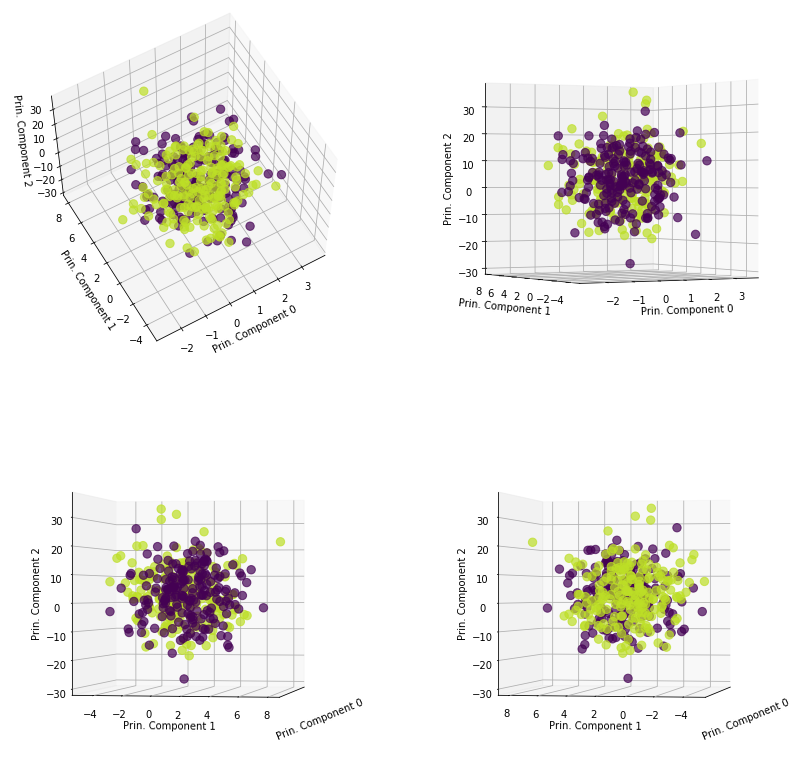

In [27]:
feature_plot_3D(df, label='label', features=[0, 1, 2])

In [28]:
def test_feature_plot_3D():

    np.random.seed(seed=1)
    dataset = {'label': 250*['yes'] + 250*['no'],
               0: np.random.normal(0.5, 1, size=500),
               1: np.random.normal(1, 2, size=500),
               2: np.random.normal(3, 10, size=500)
               }
    df = pd.DataFrame(data=dataset)

    xy = pca.feature_plot_3D(df, label='label', features=[0, 1], randsel=True,
                             fname='test1.png')
    # assert len(xy[1]) == 200
    # assert os.path.isfile('test1.png')
    #
    # xy = pca.feature_plot_3D(df, label='label', features=[0, 1], randsel=False)
    # assert len(xy[1]) == 250